In [72]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests as req
req.__version__
#import the API key
from config import weather_api_key
import time
from datetime import datetime
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [73]:
#create a set of random latitudes and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs
#zip puts objects into a tuple

In [74]:
#add latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [75]:
#create a list to hold the cities
cities=[]
#identify the nearest city for each latitude and longitude combination
for i in coordinates:
    city=(citipy.nearest_city(i[0], i[1]).city_name)
    #if city is unique add it to the list
    if city not in cities:
        cities.append(city)
#print to confirm count
len(cities)
cities

['qaqortoq',
 'umzimvubu',
 'lazaro cardenas',
 'dale',
 'nizhnyaya poyma',
 'vaitupu',
 'hobart',
 'talnakh',
 'puerto ayora',
 'hobyo',
 'yar-sale',
 'barentsburg',
 'ust-maya',
 'busselton',
 'chokurdakh',
 'xunchang',
 'arraial do cabo',
 'geresk',
 'taolanaro',
 'bury saint edmunds',
 'yellowknife',
 'mataura',
 'yumen',
 'damietta',
 'bahia de caraquez',
 'abong mbang',
 'aklavik',
 'georgetown',
 'vardo',
 'thompson',
 'sur',
 'airai',
 'atuona',
 'punta arenas',
 'la ronge',
 'ancud',
 'dunedin',
 'dudinka',
 'saint-philippe',
 'albany',
 'kavieng',
 'bundaberg',
 'swan hill',
 'attawapiskat',
 'goundam',
 'rikitea',
 'bluff',
 'adeje',
 'hilo',
 'severo-kurilsk',
 'yakeshi',
 'partenit',
 'carutapera',
 'qaanaaq',
 'westport',
 'aguimes',
 'vaini',
 'nizhneyansk',
 'meulaboh',
 'saskylakh',
 'upernavik',
 'kedrovyy',
 'urdzhar',
 'norman wells',
 'soyo',
 'oostburg',
 'hokitika',
 'seoul',
 'erzin',
 'kruisfontein',
 'barrow',
 'naze',
 'khatanga',
 'yerbogachen',
 'la liberta

In [76]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
# Create an endpoint URL for a city.
#city_url = url + "&q=" + city

In [77]:
#create an empty list to hold city data
city_data=[]
#print the beginning of the logging
print("Beginning Data Retrieval      ")
print("-----------------------------")

#create counters
record_count=1
set_count=1
#loop through all cities in our list:
#enumerate iterates through list of cities and retrieves both the index and the city from the list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count=1
        #prgram pauses for 60 seconds you can only do 60 calls per minutes on OpenWeatherMap API free version
        time.sleep(60)
        
    #create endpoint URL with each city
    city_url= url + "&q=" + city.replace(" ","+")
        
    #log the URL, record, and set the numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #add 1 to the record count
    record_count+=1

        
#run an API request for each of the cities
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
            # If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 1 | lazaro cardenas
Processing Record 4 of Set 1 | dale
Processing Record 5 of Set 1 | nizhnyaya poyma
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | hobyo
Processing Record 11 of Set 1 | yar-sale
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | ust-maya
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | xunchang
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | geresk
City not found. Skipping...
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processin

Processing Record 33 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 34 of Set 4 | kirakira
Processing Record 35 of Set 4 | richards bay
Processing Record 36 of Set 4 | sinnamary
Processing Record 37 of Set 4 | hamilton
Processing Record 38 of Set 4 | hambantota
Processing Record 39 of Set 4 | sibolga
Processing Record 40 of Set 4 | guerrero negro
Processing Record 41 of Set 4 | wodonga
Processing Record 42 of Set 4 | ternate
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | belyy yar
Processing Record 46 of Set 4 | gornyy
Processing Record 47 of Set 4 | novaya malykla
Processing Record 48 of Set 4 | kegayli
City not found. Skipping...
Processing Record 49 of Set 4 | khirkiya
Processing Record 50 of Set 4 | kaeo
Processing Record 1 of Set 5 | sitka
Processing Record 2 of Set 5 | leningradskiy
Processing Record 3 of Set 5 | luanda
Processing Record 4 of Set 5 | sistranda
Processing Record 5 of Set 5 |

Processing Record 21 of Set 8 | powell
Processing Record 22 of Set 8 | kahului
Processing Record 23 of Set 8 | port keats
Processing Record 24 of Set 8 | urdoma
Processing Record 25 of Set 8 | torit
Processing Record 26 of Set 8 | coihaique
Processing Record 27 of Set 8 | muros
Processing Record 28 of Set 8 | cherskiy
Processing Record 29 of Set 8 | perevolotskiy
Processing Record 30 of Set 8 | la mana
Processing Record 31 of Set 8 | minturno
Processing Record 32 of Set 8 | bria
Processing Record 33 of Set 8 | kovernino
Processing Record 34 of Set 8 | grand gaube
Processing Record 35 of Set 8 | quelimane
Processing Record 36 of Set 8 | vao
Processing Record 37 of Set 8 | kungurtug
Processing Record 38 of Set 8 | rudnogorsk
Processing Record 39 of Set 8 | saleaula
City not found. Skipping...
Processing Record 40 of Set 8 | capao da canoa
Processing Record 41 of Set 8 | salekhard
Processing Record 42 of Set 8 | rocha
Processing Record 43 of Set 8 | san quintin
Processing Record 44 of Set

Processing Record 8 of Set 12 | paita
Processing Record 9 of Set 12 | sunrise manor
Processing Record 10 of Set 12 | olafsvik
Processing Record 11 of Set 12 | lewistown
Processing Record 12 of Set 12 | marsh harbour
Processing Record 13 of Set 12 | mocambique
City not found. Skipping...
Processing Record 14 of Set 12 | andra
Processing Record 15 of Set 12 | kalabo
Processing Record 16 of Set 12 | scottsbluff
Processing Record 17 of Set 12 | pangnirtung
Processing Record 18 of Set 12 | lavumisa
Processing Record 19 of Set 12 | bajil
Processing Record 20 of Set 12 | funadhoo
Processing Record 21 of Set 12 | galgani
City not found. Skipping...
Processing Record 22 of Set 12 | fortuna
Processing Record 23 of Set 12 | berezovyy
Processing Record 24 of Set 12 | biak
Processing Record 25 of Set 12 | tieli
Processing Record 26 of Set 12 | berlevag
Processing Record 27 of Set 12 | jumla
Processing Record 28 of Set 12 | haines junction
Processing Record 29 of Set 12 | hervey bay
Processing Recor

In [78]:
#convert the array of dictinoaries to a Pandas DataFrame
#city_data_df = pd.read_csv("weather_data/cities.csv")
#city_data_df
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaqortoq,60.7167,-46.0333,50.50,72,71,14.12,GL,2021-12-20 22:01:55
1,Lazaro Cardenas,17.9583,-102.2000,83.41,64,25,7.09,MX,2021-12-20 22:01:56
2,Dale,38.1689,-86.9900,42.58,65,1,3.44,US,2021-12-20 22:01:57
3,Nizhnyaya Poyma,56.1622,97.1933,-9.81,89,100,7.40,RU,2021-12-20 22:01:57
4,Hobart,-42.8794,147.3294,62.46,53,75,13.80,AU,2021-12-20 22:00:18
5,Talnakh,69.4865,88.3972,-29.79,93,63,4.09,RU,2021-12-20 22:01:58
6,Puerto Ayora,-0.7393,-90.3518,71.55,91,88,7.00,EC,2021-12-20 22:01:58
7,Hobyo,5.3505,48.5268,78.24,81,78,17.96,SO,2021-12-20 22:01:59
8,Yar-Sale,66.8333,70.8333,-20.67,99,99,11.54,RU,2021-12-20 22:01:59
9,Ust-Maya,60.4167,134.5333,-33.09,99,100,1.88,RU,2021-12-20 22:02:02


In [79]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaqortoq,GL,2021-12-20 22:01:55,60.7167,-46.0333,50.50,72,71,14.12
1,Lazaro Cardenas,MX,2021-12-20 22:01:56,17.9583,-102.2000,83.41,64,25,7.09
2,Dale,US,2021-12-20 22:01:57,38.1689,-86.9900,42.58,65,1,3.44
3,Nizhnyaya Poyma,RU,2021-12-20 22:01:57,56.1622,97.1933,-9.81,89,100,7.40
4,Hobart,AU,2021-12-20 22:00:18,-42.8794,147.3294,62.46,53,75,13.80
...,...,...,...,...,...,...,...,...,...
537,Chicama,PE,2021-12-20 22:17:06,-7.8447,-79.1469,66.74,67,86,9.01
538,Mariental,NA,2021-12-20 22:17:06,-24.6333,17.9667,75.38,45,60,11.18
539,Sawakin,SD,2021-12-20 22:17:06,19.1059,37.3321,74.89,69,100,18.54
540,Chukhloma,RU,2021-12-20 22:17:07,58.7525,42.6825,6.96,93,100,8.48


In [81]:
#this was ouputted and saved already - I reopened and then imported the csv so I didn't 
#have to rerun the loop to get the list of 500 cities into a dictionary
output_data_file="weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City ID")

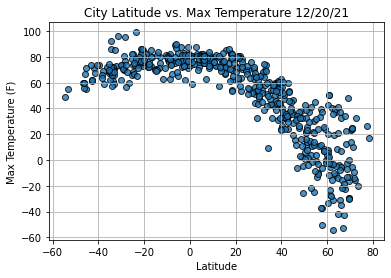

In [82]:
#create a scatter plot for max temp vs. latitude for different cities
#extract data
#

lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

#build scatter 
plt.scatter(lats,max_temps,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

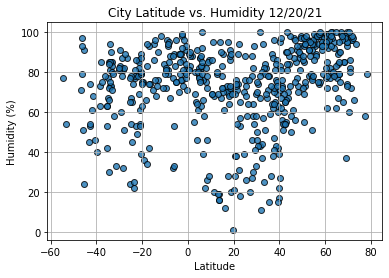

In [83]:
#build scatter 
plt.scatter(lats,humidity,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

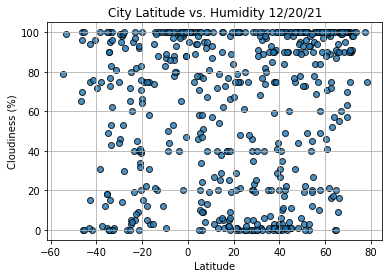

In [84]:
#build scatter 
plt.scatter(lats,cloudiness,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

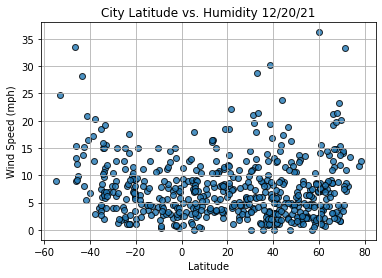

In [85]:
#build scatter 
plt.scatter(lats,wind_speed,edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

#add labels etc.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save plot
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

In [86]:
#create a function to create perform linear regression on the weather data
#plot regression line and the equation with the data
def plot_line_regression(x_values,y_values,title,y_label,text_coordinates):
    #run regression on hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #get the line equation
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    #annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [87]:
north_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
south_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]

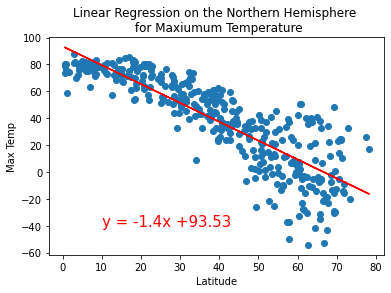

In [88]:
#linear regression on the northern hemisphere
x_values=north_hemi_df["Lat"]
y_values=north_hemi_df["Max Temp"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maxiumum Temperature", "Max Temp",(10,-40))

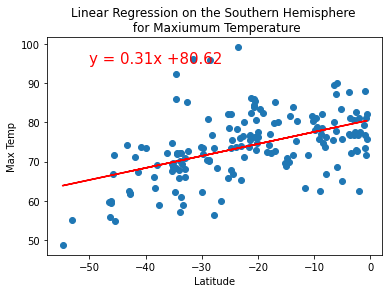

In [89]:
#linear regression on the southern hemisphere
x_values=south_hemi_df["Lat"]
y_values=south_hemi_df["Max Temp"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maxiumum Temperature", "Max Temp",(-50, 95))

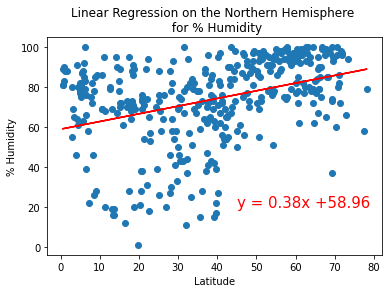

In [90]:
#linear regression on the northern hemisphere
x_values=north_hemi_df["Lat"]
y_values=north_hemi_df["Humidity"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", "% Humidity",(45,20))

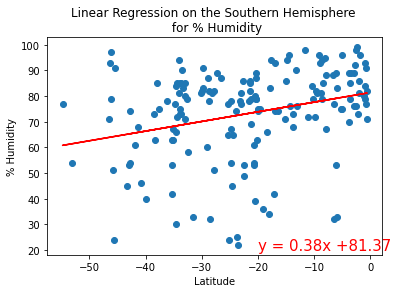

In [91]:
#linear regression on the southern hemisphere
x_values=south_hemi_df["Lat"]
y_values=south_hemi_df["Humidity"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity",(-20,20))

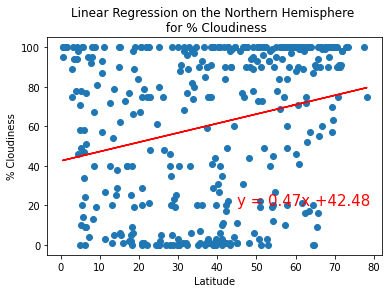

In [92]:
#linear regression on the northern hemisphere
x_values=north_hemi_df["Lat"]
y_values=north_hemi_df["Cloudiness"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness", "% Cloudiness",(45,20))

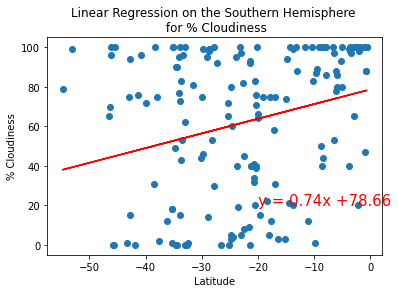

In [93]:
#linear regression on the southern hemisphere
x_values=south_hemi_df["Lat"]
y_values=south_hemi_df["Cloudiness"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness", "% Cloudiness",(-20,20))

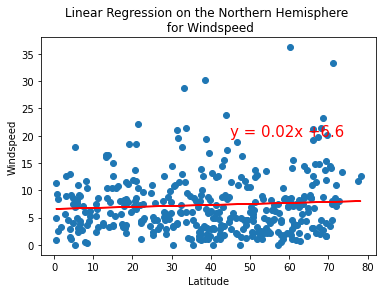

In [94]:
#linear regression on the northern hemisphere
x_values=north_hemi_df["Lat"]
y_values=north_hemi_df["Wind Speed"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere \n for Windspeed", "Windspeed",(45,20))

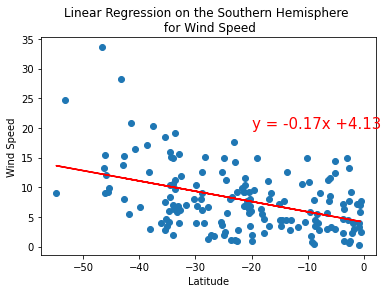

In [95]:
#linear regression on the southern hemisphere
x_values=south_hemi_df["Lat"]
y_values=south_hemi_df["Wind Speed"]
#call the function
plot_line_regression(x_values,y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed",(-20,20))